## Author - Nevena Mitic

### Dataset 
The dataset I chose is the "Census Income" dataset. Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 

### Description of Variables
The dataset contains 32561 observations of 14 variables:
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Problem Statement

Prediction task is to determine whether a person makes over 50K a year. 

Implemented two different models for accuracy comparison, Bayes and Logistic Regression. Used SelectKBest() method to pick the top 10 most influential features prior to fitting Logistic Regression model.



## Import modules

In [333]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

## Data Pre-Processing

In [308]:
fileName = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

In [334]:
# load dataset
Adults_df = pd.read_csv(fileName,sep=',', header=None)
Adults_df .columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
               'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain',
               'capital_loss', 'hours_per_week', 'native_country', 'target']
## Remove rows with missing values, accounting for mising values coded as '?'
cols = ['workclass', 'education','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
for column in cols:
    Adults_df.loc[Adults_df[column] == '?', column] = np.nan
Adults_df.dropna(axis = 0, inplace = True)

# Strip whitespace
Adults_df['target'] = Adults_df["target"].map(str.strip)
### Encode target variables
Adults_df.loc[Adults_df.loc[:, "target"] == '<=50K', "target"] = 0
Adults_df.loc[Adults_df.loc[:, "target"] == '>50K', "target"] = 1
#Adults_df.groupby('target').mean()
print(Adults_df.head(10))

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital_status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3  

## Data Visualization

C:\Users\Ivan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ivan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ivan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Ivan\Anaconda3\lib

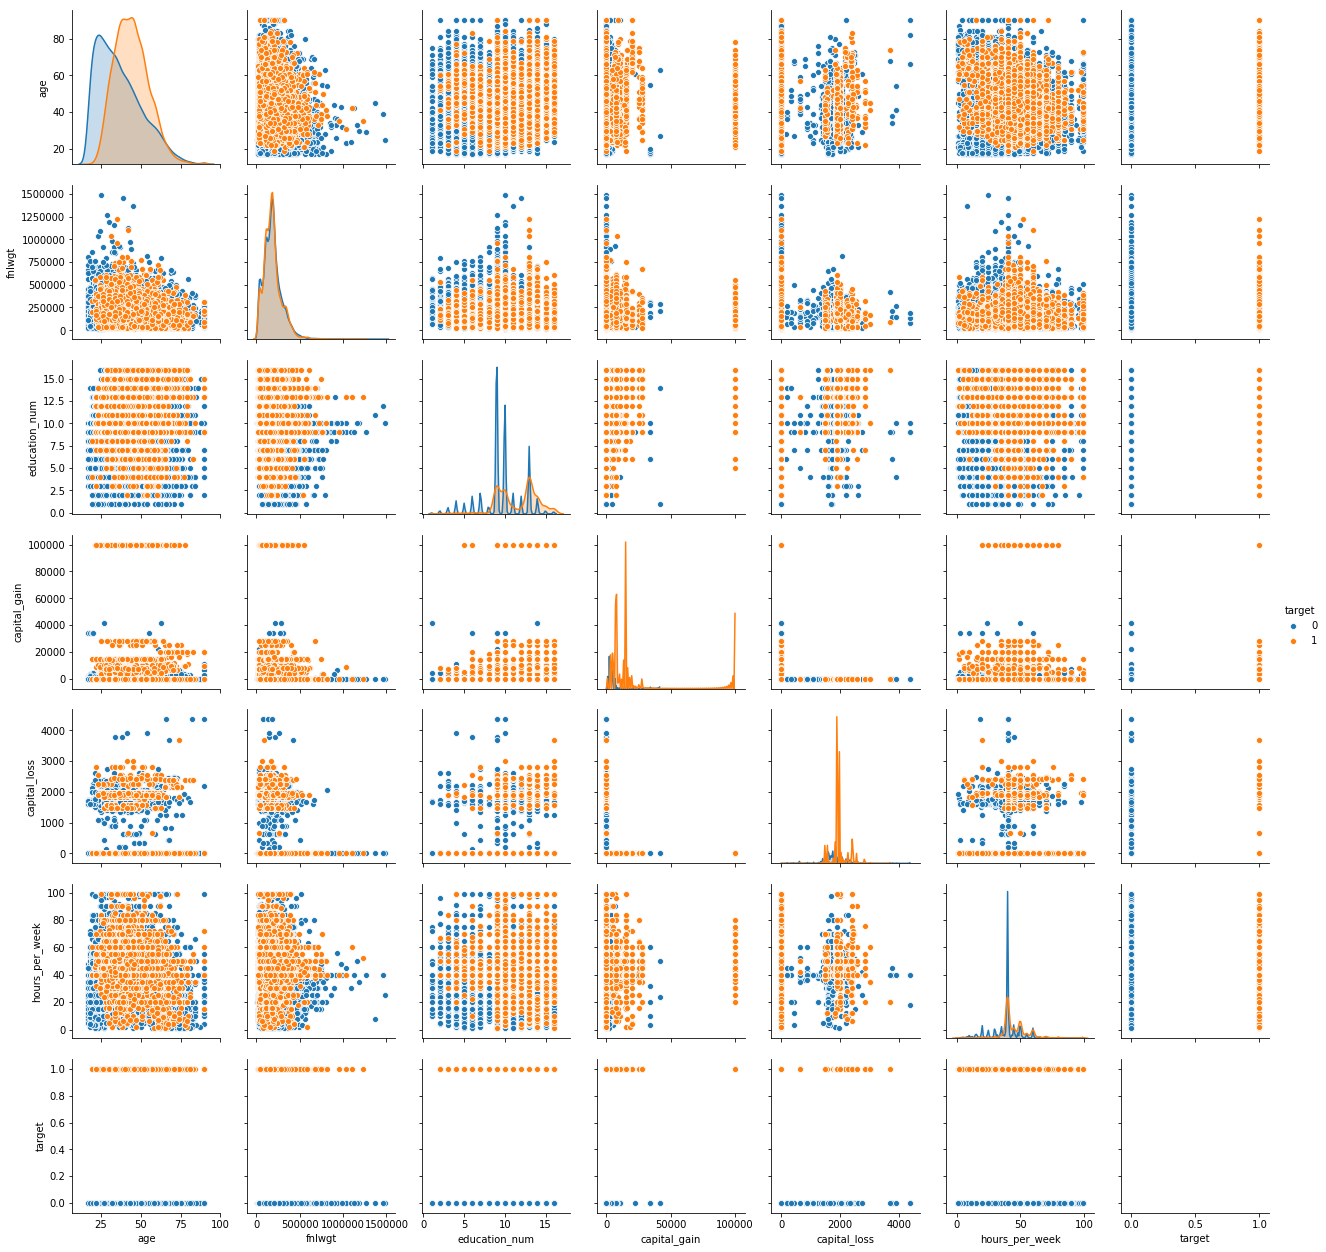

In [310]:
# show plots in the notebook
%matplotlib inline
import seaborn as sns

def distribution_categorical_variable(df, columnName):
    plt.title("Distribution of " + columnName + " column")
    df.loc[:,columnName].value_counts().plot(kind='bar')   
    plt.show()
def distribution_numerical_variable(df, columnName):
    plt.title("Distribution of " + columnName + " column")
    plt.hist(df.loc[:, columnName])
    plt.show()
    
sns.pairplot(Adults_df, size=2.5, hue='target')

Let's start with the histograms of occupation and hours per week.

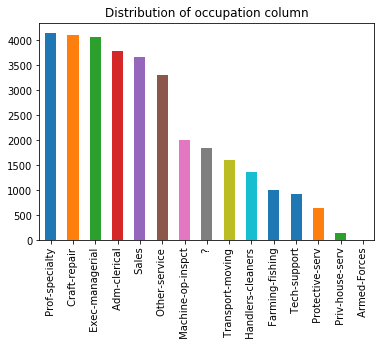

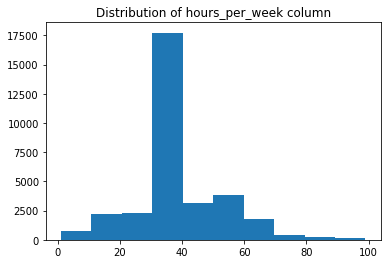

In [311]:
distribution_categorical_variable(Adults_df, "occupation")
distribution_numerical_variable(Adults_df, "hours_per_week")

Let's take a look at the distribution of educations for those making more than 50K versus those making less.

Text(0, 0.5, 'Frequency')

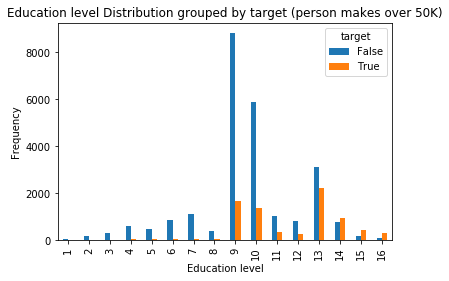

In [312]:
# barplot of education level grouped by target (True - more than 50K or False - less then 50K)
pd.crosstab(Adults_df.education_num, Adults_df.target.astype(bool)).plot(kind='bar')
plt.title('Education level Distribution grouped by target (person makes over 50K)')
plt.xlabel('Education level')
plt.ylabel('Frequency')

## Prepare Data for Logistic Regression

In [335]:
# Strip whitespace
#Adults_df['target'] = Adults_df["target"].map(str.strip)
Adults_df['education'] = Adults_df["education"].map(str.strip)
Adults_df['workclass'] = Adults_df["workclass"].map(str.strip)
Adults_df['occupation'] = Adults_df["occupation"].map(str.strip)
Adults_df['sex'] = Adults_df["sex"].map(str.strip)
#Adults_df['target'] = Adults_df["target"].map(str.strip)

# Consolidate occupation data
Adults_df.loc[Adults_df.loc[:, "occupation"] == "Tech-support", "occupation"] = "OfficeWork"
Adults_df.loc[Adults_df.loc[:, "occupation"] == "Craft-repair", "occupation"] = "Service"
Adults_df.loc[Adults_df.loc[:, "occupation"] == "Other-service", "occupation"] = "Service"
Adults_df.loc[Adults_df.loc[:, "occupation"] == "Exec-managerial", "occupation"] = "OfficeWork"
Adults_df.loc[Adults_df.loc[:, "occupation"] == "Prof-specialty", "occupation"] = "OfficeWork"
Adults_df.loc[Adults_df.loc[:, "occupation"] == "Handlers-cleaners", "occupation"] = "Service"
Adults_df.loc[Adults_df.loc[:, "occupation"] == "Machine-op-inspct", "occupation"] = "Service"
Adults_df.loc[Adults_df.loc[:, "occupation"] == "Adm-clerical", "occupation"] = "OfficeWork"
Adults_df.loc[Adults_df.loc[:, "occupation"] == "Farming-fishing", "occupation"] = "Service"
Adults_df.loc[Adults_df.loc[:, "occupation"] == "Transport-moving", "occupation"] = "Service"
Adults_df.loc[Adults_df.loc[:, "occupation"] == "Priv-house-serv", "occupation"] = "Service"
Adults_df.loc[Adults_df.loc[:, "occupation"] == "Protective-serv", "occupation"] = "Service"

# One-hot encoding occupation column
# Create 4 new columns, one for each category
Adults_df.loc[:, "occu_1"] = (Adults_df.loc[:, "occupation"] == "OfficeWork").astype(int)
Adults_df.loc[:, "occu_2"] = (Adults_df.loc[:, "occupation"] == "Service").astype(int)
Adults_df.loc[:, "occu_3"] = (Adults_df.loc[:, "occupation"] == "Sales").astype(int)
Adults_df.loc[:, "occu_4"] = (Adults_df.loc[:, "occupation"] == "Armed-Forces").astype(int)

# Consolidate workclass data
Adults_df.loc[Adults_df.loc[:, "workclass"] == "Self-emp-not-inc", "workclass"] = "Private"
Adults_df.loc[Adults_df.loc[:, "workclass"] == "Self-emp-inc", "workclass"] = "Private"
Adults_df.loc[Adults_df.loc[:, "workclass"] == "Local-gov", "workclass"] = "Federal-gov"
Adults_df.loc[Adults_df.loc[:, "workclass"] == "State-gov", "workclass"] = "Federal-gov"
Adults_df.loc[Adults_df.loc[:, "workclass"] == "Never-worked", "workclass"] = "Without-pay"

# One-hot encoding work-class column
# Create 3 new columns, one for each category
Adults_df.loc[:, "work_1"] = (Adults_df.loc[:, "workclass"] == "Private").astype(int)
Adults_df.loc[:, "work_2"] = (Adults_df.loc[:, "workclass"] == "Federal-gov").astype(int)
Adults_df.loc[:, "work_3"] = (Adults_df.loc[:, "workclass"] == "Without-pay").astype(int)

# Remove obsolete columns
Adults_df = Adults_df.drop("occupation", axis=1)
Adults_df = Adults_df.drop("workclass", axis=1)
##############
# Select numeric feature columns and target column for classification
Adults_df = Adults_df[['age', 'fnlwgt', 'occu_1', 'occu_2','occu_3','occu_4', 'work_1', 'work_2', 'work_3','hours_per_week', 'education_num',
                  'capital_gain', 'capital_loss', 'target']]
print(Adults_df.head(10))

   age  fnlwgt  occu_1  occu_2  occu_3  occu_4  work_1  work_2  work_3  \
0   39   77516       1       0       0       0       0       1       0   
1   50   83311       1       0       0       0       1       0       0   
2   38  215646       0       1       0       0       1       0       0   
3   53  234721       0       1       0       0       1       0       0   
4   28  338409       1       0       0       0       1       0       0   
5   37  284582       1       0       0       0       1       0       0   
6   49  160187       0       1       0       0       1       0       0   
7   52  209642       1       0       0       0       1       0       0   
8   31   45781       1       0       0       0       1       0       0   
9   42  159449       1       0       0       0       1       0       0   

   hours_per_week  education_num  capital_gain  capital_loss  target  
0              40             13          2174             0       0  
1              13             13           

## Do Bayes model

In [340]:
from sklearn.naive_bayes import GaussianNB

# instantiae model
gnb2 = GaussianNB()

# split data into features and targets
y, X = dmatrices('target ~ age + fnlwgt + occu_1 + occu_2 + occu_3 + occu_4 + work_1 + work_2 + work_3 + hours_per_week +\
                  education_num + capital_gain + capital_loss',
                  Adults_df, return_type="dataframe")

X = X.drop("Intercept", axis=1)
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                  test_size=0.3,random_state=42)
# train the model on the training sets only
gnb_model2 = gnb2.fit(X, y)
#Predict the response for test dataset
y_pred = gnb2.predict(X_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7996724332070836


## Features selection
We'll use a chi-squared test to compare the relationship between each variable with sklearn's SelectKBest() method to then pick the top 10 most influential features in our dataset.

In [328]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# split data into features and targets
y, X = dmatrices('target ~ age + fnlwgt + occu_1 + occu_2 + occu_3 + occu_4 + work_1 + work_2 + work_3 + hours_per_week +\
                  education_num + capital_gain + capital_loss',
                  Adults_df, return_type="dataframe")

X = X.drop("Intercept", axis=1)
y = np.ravel(y)

# Feature extraction
test = SelectKBest(score_func=chi2, k=10)
print(X.head(5))
fit = test.fit(X, y)


    age    fnlwgt  occu_1  occu_2  occu_3  occu_4  work_1  work_2  work_3  \
0  39.0   77516.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0   
1  50.0   83311.0     1.0     0.0     0.0     0.0     1.0     0.0     0.0   
2  38.0  215646.0     0.0     1.0     0.0     0.0     1.0     0.0     0.0   
3  53.0  234721.0     0.0     1.0     0.0     0.0     1.0     0.0     0.0   
4  28.0  338409.0     1.0     0.0     0.0     0.0     1.0     0.0     0.0   

   hours_per_week  education_num  capital_gain  capital_loss  
0            40.0           13.0        2174.0           0.0  
1            13.0           13.0           0.0           0.0  
2            40.0            9.0           0.0           0.0  
3            40.0            7.0           0.0           0.0  
4            40.0           13.0           0.0           0.0  


In [329]:
# Summarize scores
print(fit.scores_)

[8.60061182e+03 1.71147683e+05 9.65986843e+02 7.14374363e+02
 1.62228098e+01 8.28109192e-01 2.84984965e-01 1.08100032e+02
 6.66104369e+00 6.47640900e+03 2.40142178e+03 8.21924671e+07
 1.37214589e+06]


In [330]:
list_features = list(zip(Adults_df.columns[0:13], fit.get_support()))
print(list_features)

[('age', True), ('fnlwgt', True), ('occu_1', True), ('occu_2', True), ('occu_3', True), ('occu_4', False), ('work_1', False), ('work_2', True), ('work_3', False), ('hours_per_week', True), ('education_num', True), ('capital_gain', True), ('capital_loss', True)]


In [331]:
# Summarize selected features
selected_features = []
for i in list_features:
    left, right, = i
    if(right == True):
        selected_features.append(left)
        
#print(selected_features)        
    
features = fit.transform(X)

print(features[0:1,:])

[[3.9000e+01 7.7516e+04 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
  4.0000e+01 1.3000e+01 2.1740e+03 0.0000e+00]]


In [332]:
# rebuild X as dataframe of selected features
X = pd.DataFrame(features, columns = selected_features)

## Logistic Regression

In [319]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.7977949080187955

79% accuracy seems good!

In [320]:
# what percentage making more than 50K?
y.mean()

0.2408095574460244

In [321]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,age,[-0.006938439120612807]
1,fnlwgt,[-3.7572012511614904e-06]
2,occu_1,[0.0002083900636005592]
3,occu_2,[-0.0005608246319224255]
4,occu_3,[-2.5117387663073528e-05]
5,work_2,[2.2080115686763878e-05]
6,hours_per_week,[-0.008068567468178743]
7,education_num,[-0.001725865432854004]
8,capital_gain,[0.00033802938582852267]
9,capital_loss,[0.0007776216972904789]


Increases in hours per week rating and age correspond to a decrease in the likelihood of making 50K

## Model Evaluation Using a Validation Set

In [322]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [323]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print (predicted)

[0. 0. 0. ... 1. 0. 0.]


In [324]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print (probs)

[[0.77328504 0.22671496]
 [0.79410967 0.20589033]
 [0.81540167 0.18459833]
 ...
 [0.33045369 0.66954631]
 [0.7168347  0.2831653 ]
 [0.69048149 0.30951851]]


In [325]:
# generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.7994677039615109
0.5756168187472157


In [326]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[0.79490329 0.79791155 0.79269042 0.79330467 0.79453317 0.80804668
 0.79084767 0.80128993 0.79791155 0.8022113 ]
0.7973650213978737


Looks good. It's still performing at 75% accuracy